In [64]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import pandas as pd
import geopandas as gpd
from IPython.display import IFrame
%matplotlib inline
ox.__version__

'1.0.0'

You can configure OSMnx using `ox.config()`. See the [documentation](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.utils.config) for the settings you can configure. For example, by default OSMnx caches all server responses to prevent repeatedly hitting the server for the same query every time you run it. This both makes our code faster on subsequent runs and helps us be a \"good neighbor\" to the server. But you can turn caching off (or back on again) with the `use_cache` parameter. Any parameters not passed to the config function are (re-)set to their original default values whenever you call it. API responses can be cached locally so OSMnx doesn't have to request the same data from the API multiple times: saving bandwidth, increasing speed, and enabling reproducibility.

In [ ]:
# turn response caching on and turn on logging to your terminal window
ox.config(log_console=True, use_cache=True)

## 1. Query place boundaries

The `graph_from_place` function uses place boundary geocoding logic to find the network within your place's boundary. Let's look briefly at this place boundary querying before we get to street networks. You can download by cities, neighborhoods, boroughs, counties, states, or countries: anything with geocodable polygon boundaries in OSM's database. Notice the polygon geometries represent political boundaries, not physical/land boundaries. OSMnx will turn your geocoded place (or multiple places) boundaries into a geopandas GeoDataFrame.

In [49]:
# make query an unambiguous dict to help the geocoder find specifically what you're looking for
#note that when getting boundaries for cities, county must be passed 
places = [{#'city' : 'Merida',
           'county': 'Merida',
         'state' : 'Yucatan',
         'country' : 'Mexico'},
         {#'city' : 'Kanasin',
          'county': 'Kanasin',
         'state' : 'Yucatan',
         'country' : 'Mexico'}]

### Get place boundaries from OpenStreetMap

In [50]:
city = ox.geocode_to_gdf(places)

In [51]:
city_proj = ox.project_gdf(city)

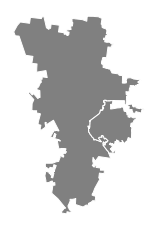

In [63]:
ax = city_proj.plot(facecolor='gray', edgecolor='white')
_ = ax.axis('off')

In [60]:
#visualize the geodataframe
city

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((-89.80120 21.14914, -89.79693 21.139...",21.191104,20.697106,-89.451303,-89.801199,258828268,relation,5961522,20.944344,-89.651198,"Mérida, Yucatán, Mexico",boundary,administrative,0.500445
1,"POLYGON ((-89.59943 20.91507, -89.59938 20.915...",20.982075,20.848589,-89.469842,-89.599434,258788687,relation,5961507,20.915277,-89.541006,"Kanasín, Yucatán, 97370, Mexico",boundary,administrative,0.487614


### Download and model street networks

OSMnx lets you download street network data and build topologically-corrected street networks, project and plot the networks, and save the street network as SVGs, GraphML files, GeoPackages, or shapefiles for later use. The street networks are directed and preserve one-way directionality.

You can download a street network by providing OSMnx any of the following:
  - a bounding box
  - a lat-long point plus a distance
  - an address plus a distance
  - a place name or list of place names (to automatically geocode and get the boundary of)
  - a polygon of the desired street network's boundaries
  - a .osm formatted xml file
  
You can also specify several different network types:
  - 'drive' - get drivable public streets (but not service roads)
  - 'drive_service' - get drivable streets, including service roads
  - 'walk' - get all streets and paths that pedestrians can use (this network type ignores one-way directionality)
  - 'bike' - get all streets and paths that cyclists can use
  - 'all' - download all non-private OSM streets and paths (this is the default network type unless you specify a different one)
  - 'all_private' - download all OSM streets and paths, including private-access ones

In [65]:
places = [{#'city' : 'Merida',
           'county': 'Merida',
         'state' : 'Yucatan',
         'country' : 'Mexico'},
         {#'city' : 'Kanasin',
          'county': 'Kanasin',
         'state' : 'Yucatan',
         'country' : 'Mexico'}]

In [70]:
# get drivable public streets network, aka road network, without service roads, e.g. private, parking lots, etc.
# use retain_all if you want to keep all disconnected subgraphs (e.g. when your places aren't adjacent)
# download and project a street network
G = ox.graph_from_place(places, network_type='drive', retain_all=False, custom_filter=None)

In [71]:
# save/load graph as a graphml file: this is the best way to save your model
# for subsequent work later
# if you want to work with your model in gephi, use gephi compatibility mode

filepath = './networks/merida-kanasin-road.graphml'
ox.save_graphml(G, filepath=filepath, gephi=False)
#G = ox.load_graphml(filepath)



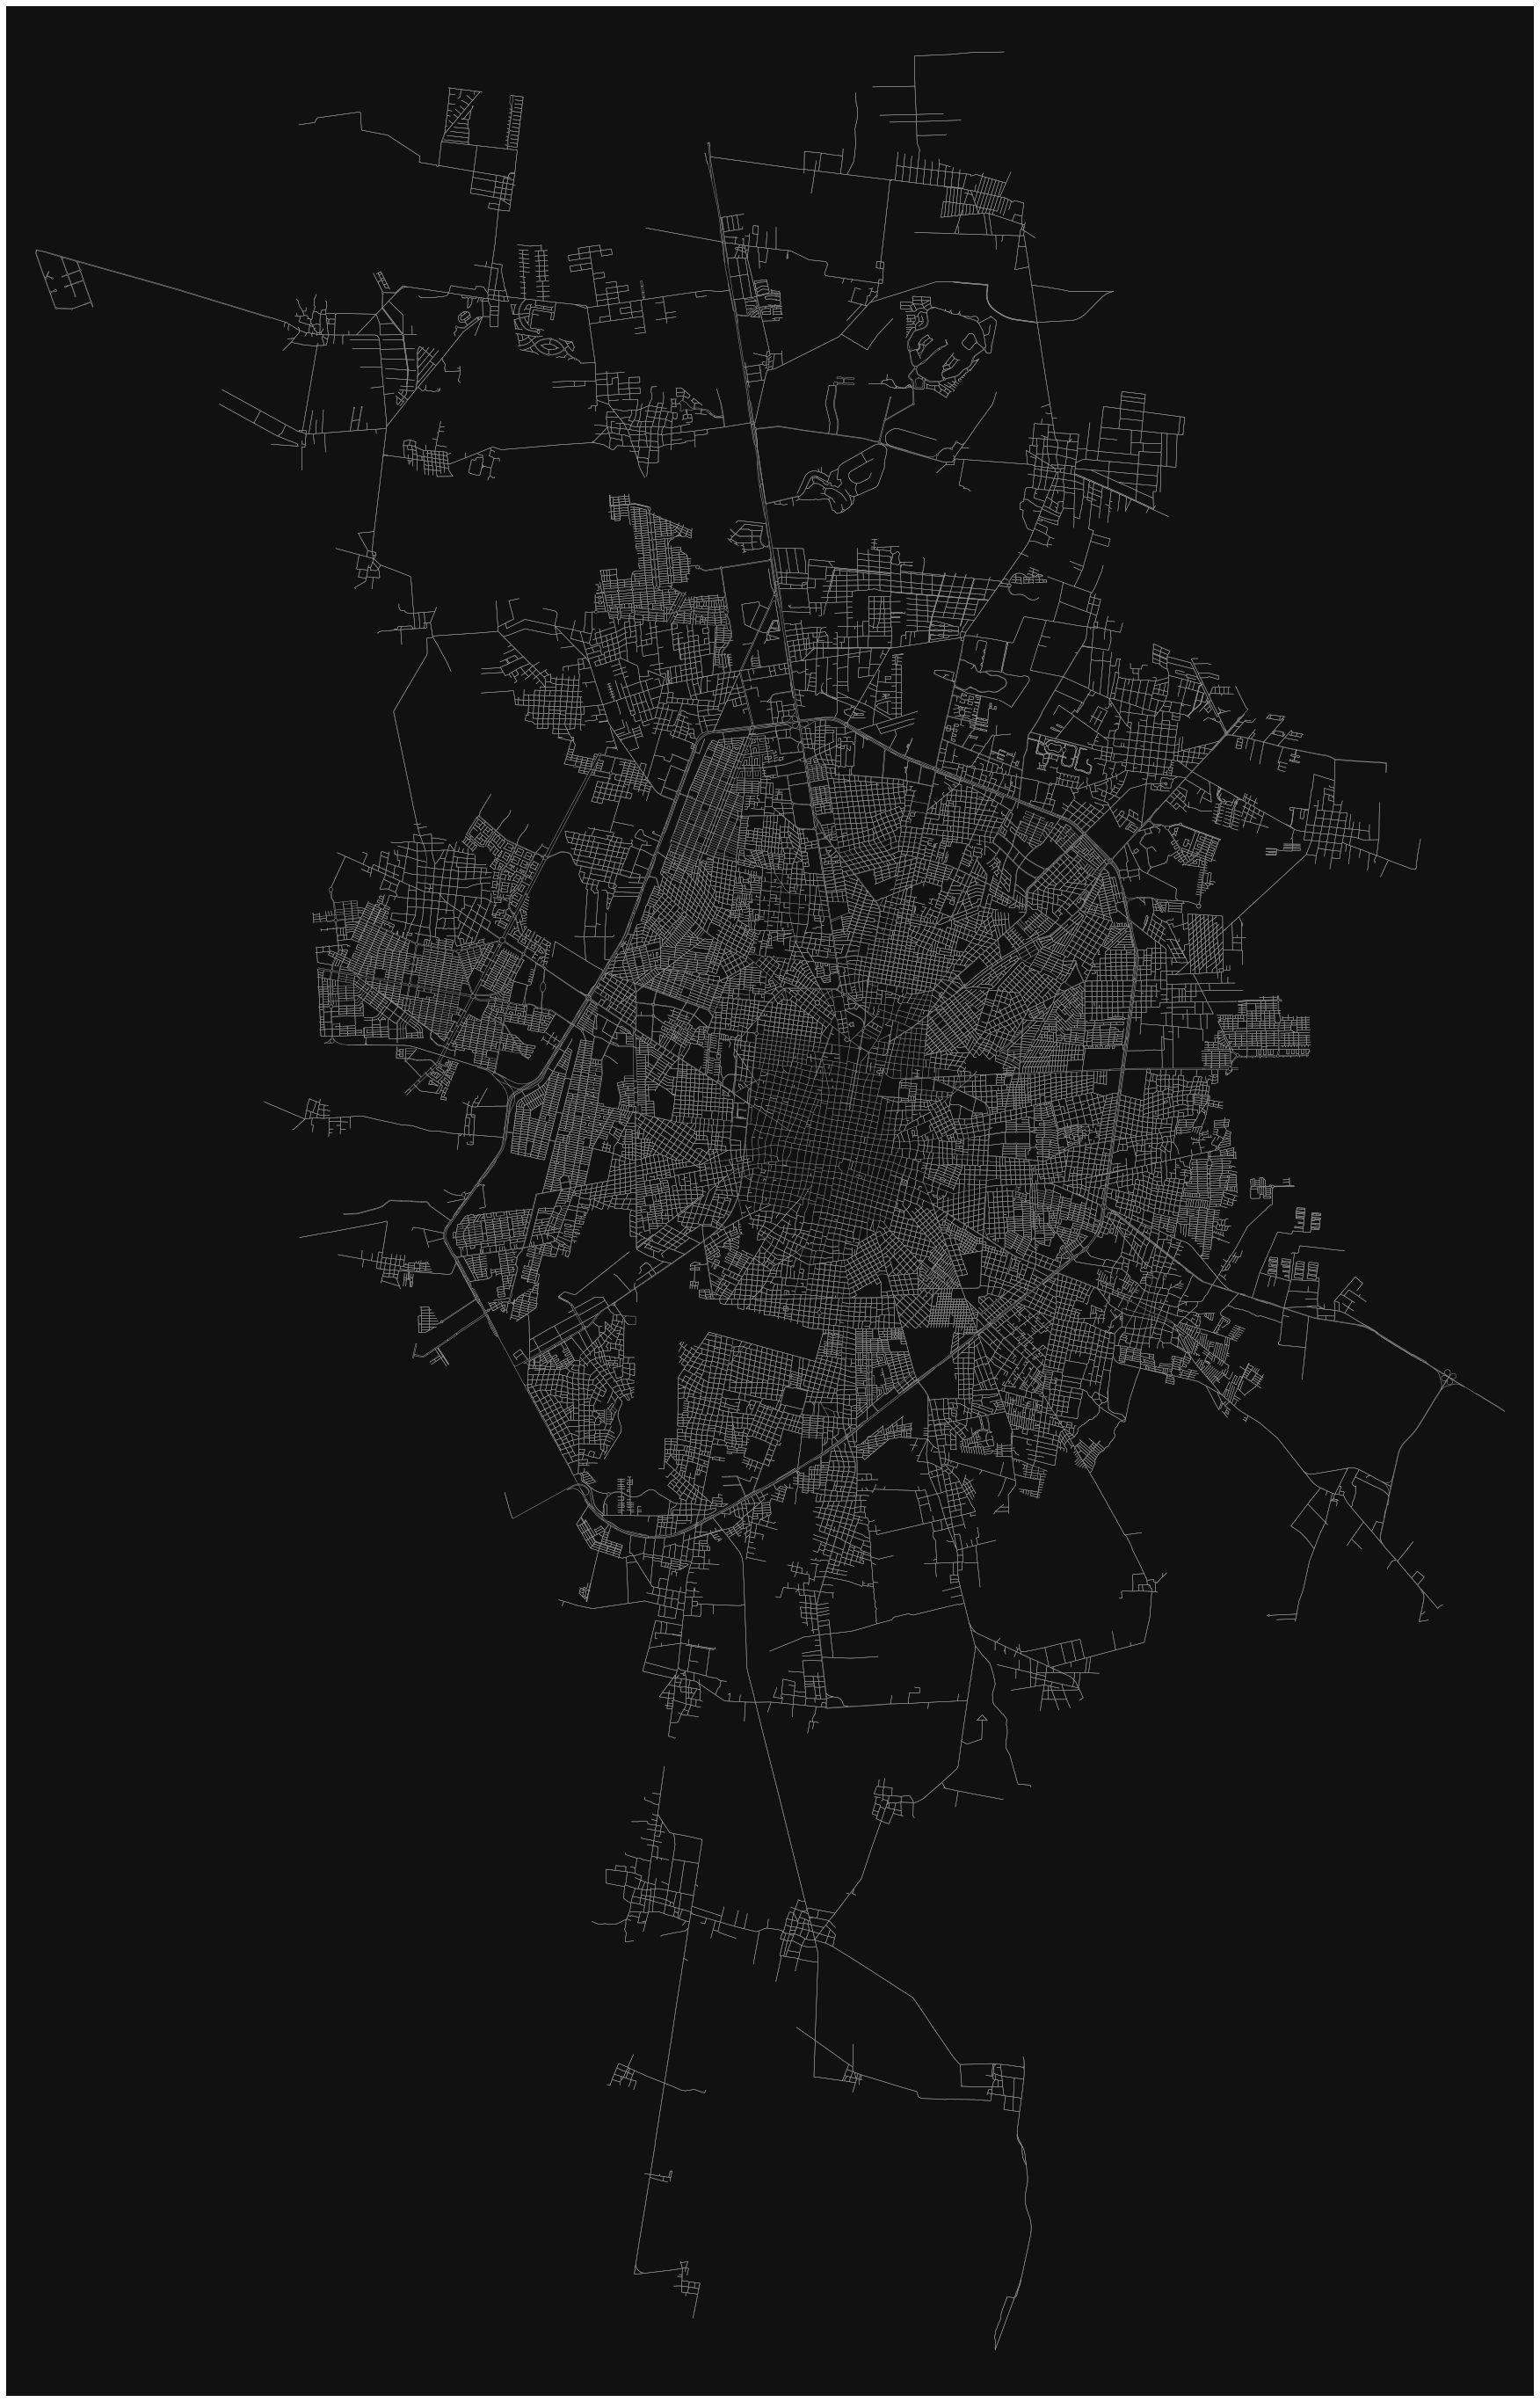

In [75]:
#fig, ax = ox.plot_graph(G, node_size=0, edge_color='w', edge_linewidth=0.2)
fig, ax = ox.plot_graph(G, 
                        #bgcolor='k', 
                        node_size=0, 
                        #node_color='#999999', 
                        #node_edgecolor='none', 
                        #node_zorder=2,
                        #edge_color='#555555', 
                        edge_linewidth=0.5, 
                        #edge_alpha=1, 
                        figsize=(50,50))
#fig.savefig('images/merida-roads.png', dpi=700, bbox_inches='tight')
plt.close()

#### Importing shapefiles containing polygons of Colonias de Mexico using GeoPandas

In [77]:
colonias = gpd.read_file('input_data/coloniasmexico/Colonias/')

In [79]:
colonias.head()

,OBJECTID,POSTALCODE,ST_NAME,MUN_NAME,SETT_NAME,SETT_TYPE,AREA,Shape_Leng,Shape_Area,geometry
0,1,20000,AGUASCALIENTES,AGUASCALIENTES,ZONA CENTRO,COLONIA,722654869.0,0.057960,0.000137,"POLYGON Z ((-102.28709 21.88362 0.00000, -102...."
1,2,20010,AGUASCALIENTES,AGUASCALIENTES,OLIVARES SANTANA,FRACCIONAMIENTO,722654869.0,0.031534,0.000023,"POLYGON Z ((-102.31287 21.89787 0.00000, -102...."
2,3,20010,AGUASCALIENTES,AGUASCALIENTES,RAMON ROMO FRANCO,FRACCIONAMIENTO,722654869.0,0.007414,0.000002,"POLYGON Z ((-102.31221 21.89372 0.00000, -102...."
3,4,20010,AGUASCALIENTES,AGUASCALIENTES,SAN CAYETANO,FRACCIONAMIENTO,722654869.0,0.028007,0.000044,"POLYGON Z ((-102.30707 21.90146 0.00000, -102...."
4,5,20010,AGUASCALIENTES,AGUASCALIENTES,COLINAS DEL RIO,FRACCIONAMIENTO,722654869.0,0.031292,0.000048,"POLYGON Z ((-102.31689 21.89465 0.00000, -102...."


In [80]:
colonias.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 58227 entries, 0 to 58226
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    58227 non-null  int64   
 1   POSTALCODE  58227 non-null  object  
 2   ST_NAME     58227 non-null  object  
 3   MUN_NAME    58227 non-null  object  
 4   SETT_NAME   58227 non-null  object  
 5   SETT_TYPE   58227 non-null  object  
 6   AREA        58227 non-null  float64 
 7   Shape_Leng  58227 non-null  float64 
 8   Shape_Area  58227 non-null  float64 
 9   geometry    58227 non-null  geometry
dtypes: float64(3), geometry(1), int64(1), object(5)
memory usage: 4.4+ MB


In [87]:
colonias_merida = colonias[(colonias['ST_NAME']=='YUCATAN') & (colonias['MUN_NAME'] == 'MÉRIDA')]

In [89]:
colonias_kanasin = colonias[(colonias['ST_NAME']=='YUCATAN') & (colonias['MUN_NAME'] == 'KANASÍN')]

In [90]:
colonias_merida.head()

,OBJECTID,POSTALCODE,ST_NAME,MUN_NAME,SETT_NAME,SETT_TYPE,AREA,Shape_Leng,Shape_Area,geometry
56515,56516,97000,YUCATAN,MÉRIDA,BARRIO SAN SEBASTIAN,FRACCIONAMIENTO,724836804.0,0.028660,0.000038,"POLYGON Z ((-89.63250 20.96072 0.00000, -89.63..."
56516,56517,97000,YUCATAN,MÉRIDA,BARRIO SANTA ANA,FRACCIONAMIENTO,724836804.0,0.031112,0.000051,"POLYGON Z ((-89.62424 20.97568 0.00000, -89.62..."
56517,56518,97000,YUCATAN,MÉRIDA,BARRIO SANTIAGO,FRACCIONAMIENTO,724836804.0,0.023338,0.000034,"POLYGON Z ((-89.62914 20.96978 0.00000, -89.62..."
56518,56519,97000,YUCATAN,MÉRIDA,FRACC JARDINES DE SAN SEBASTIAN,FRACCIONAMIENTO,724836804.0,0.005479,0.000002,"POLYGON Z ((-89.63250 20.96072 0.00000, -89.63..."
56519,56520,97000,YUCATAN,MÉRIDA,FRACC LA QUINTA,FRACCIONAMIENTO,724836804.0,0.004742,0.000001,"POLYGON Z ((-89.63478 20.97566 0.00000, -89.63..."


In [91]:
colonias_merida.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 578 entries, 56515 to 57093
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    578 non-null    int64   
 1   POSTALCODE  578 non-null    object  
 2   ST_NAME     578 non-null    object  
 3   MUN_NAME    578 non-null    object  
 4   SETT_NAME   578 non-null    object  
 5   SETT_TYPE   578 non-null    object  
 6   AREA        578 non-null    float64 
 7   Shape_Leng  578 non-null    float64 
 8   Shape_Area  578 non-null    float64 
 9   geometry    578 non-null    geometry
dtypes: float64(3), geometry(1), int64(1), object(5)
memory usage: 49.7+ KB


In [92]:
colonias_kanasin.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 24 entries, 56482 to 56505
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    24 non-null     int64   
 1   POSTALCODE  24 non-null     object  
 2   ST_NAME     24 non-null     object  
 3   MUN_NAME    24 non-null     object  
 4   SETT_NAME   24 non-null     object  
 5   SETT_TYPE   24 non-null     object  
 6   AREA        24 non-null     float64 
 7   Shape_Leng  24 non-null     float64 
 8   Shape_Area  24 non-null     float64 
 9   geometry    24 non-null     geometry
dtypes: float64(3), geometry(1), int64(1), object(5)
memory usage: 2.1+ KB
